# Name: Rawan Mohamed Said
# ID: 4

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO
from roboflow import Roboflow

## Downloading the dataset 

In [2]:
rf = Roboflow(api_key="G7UsgDZsMNj0vrgjj1k3")
project = rf.workspace("captcha-okn3p").project("digit_captcha")
version = project.version(14)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Training the YOLOv8 model on digit captcha dataset

In [3]:
# Load the YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')

In [4]:
# Train the model on your dataset
model.train(data='digit_captcha-14/data.yaml', epochs=10, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.89 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.10.9 torch-2.3.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=digit_captcha-14/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=Fals

KeyboardInterrupt: 

## Loading the saved model after training

In [5]:
# Load the saved model
model = YOLO('runs/detect/train10/weights/best.pt')

## Visualizing the results

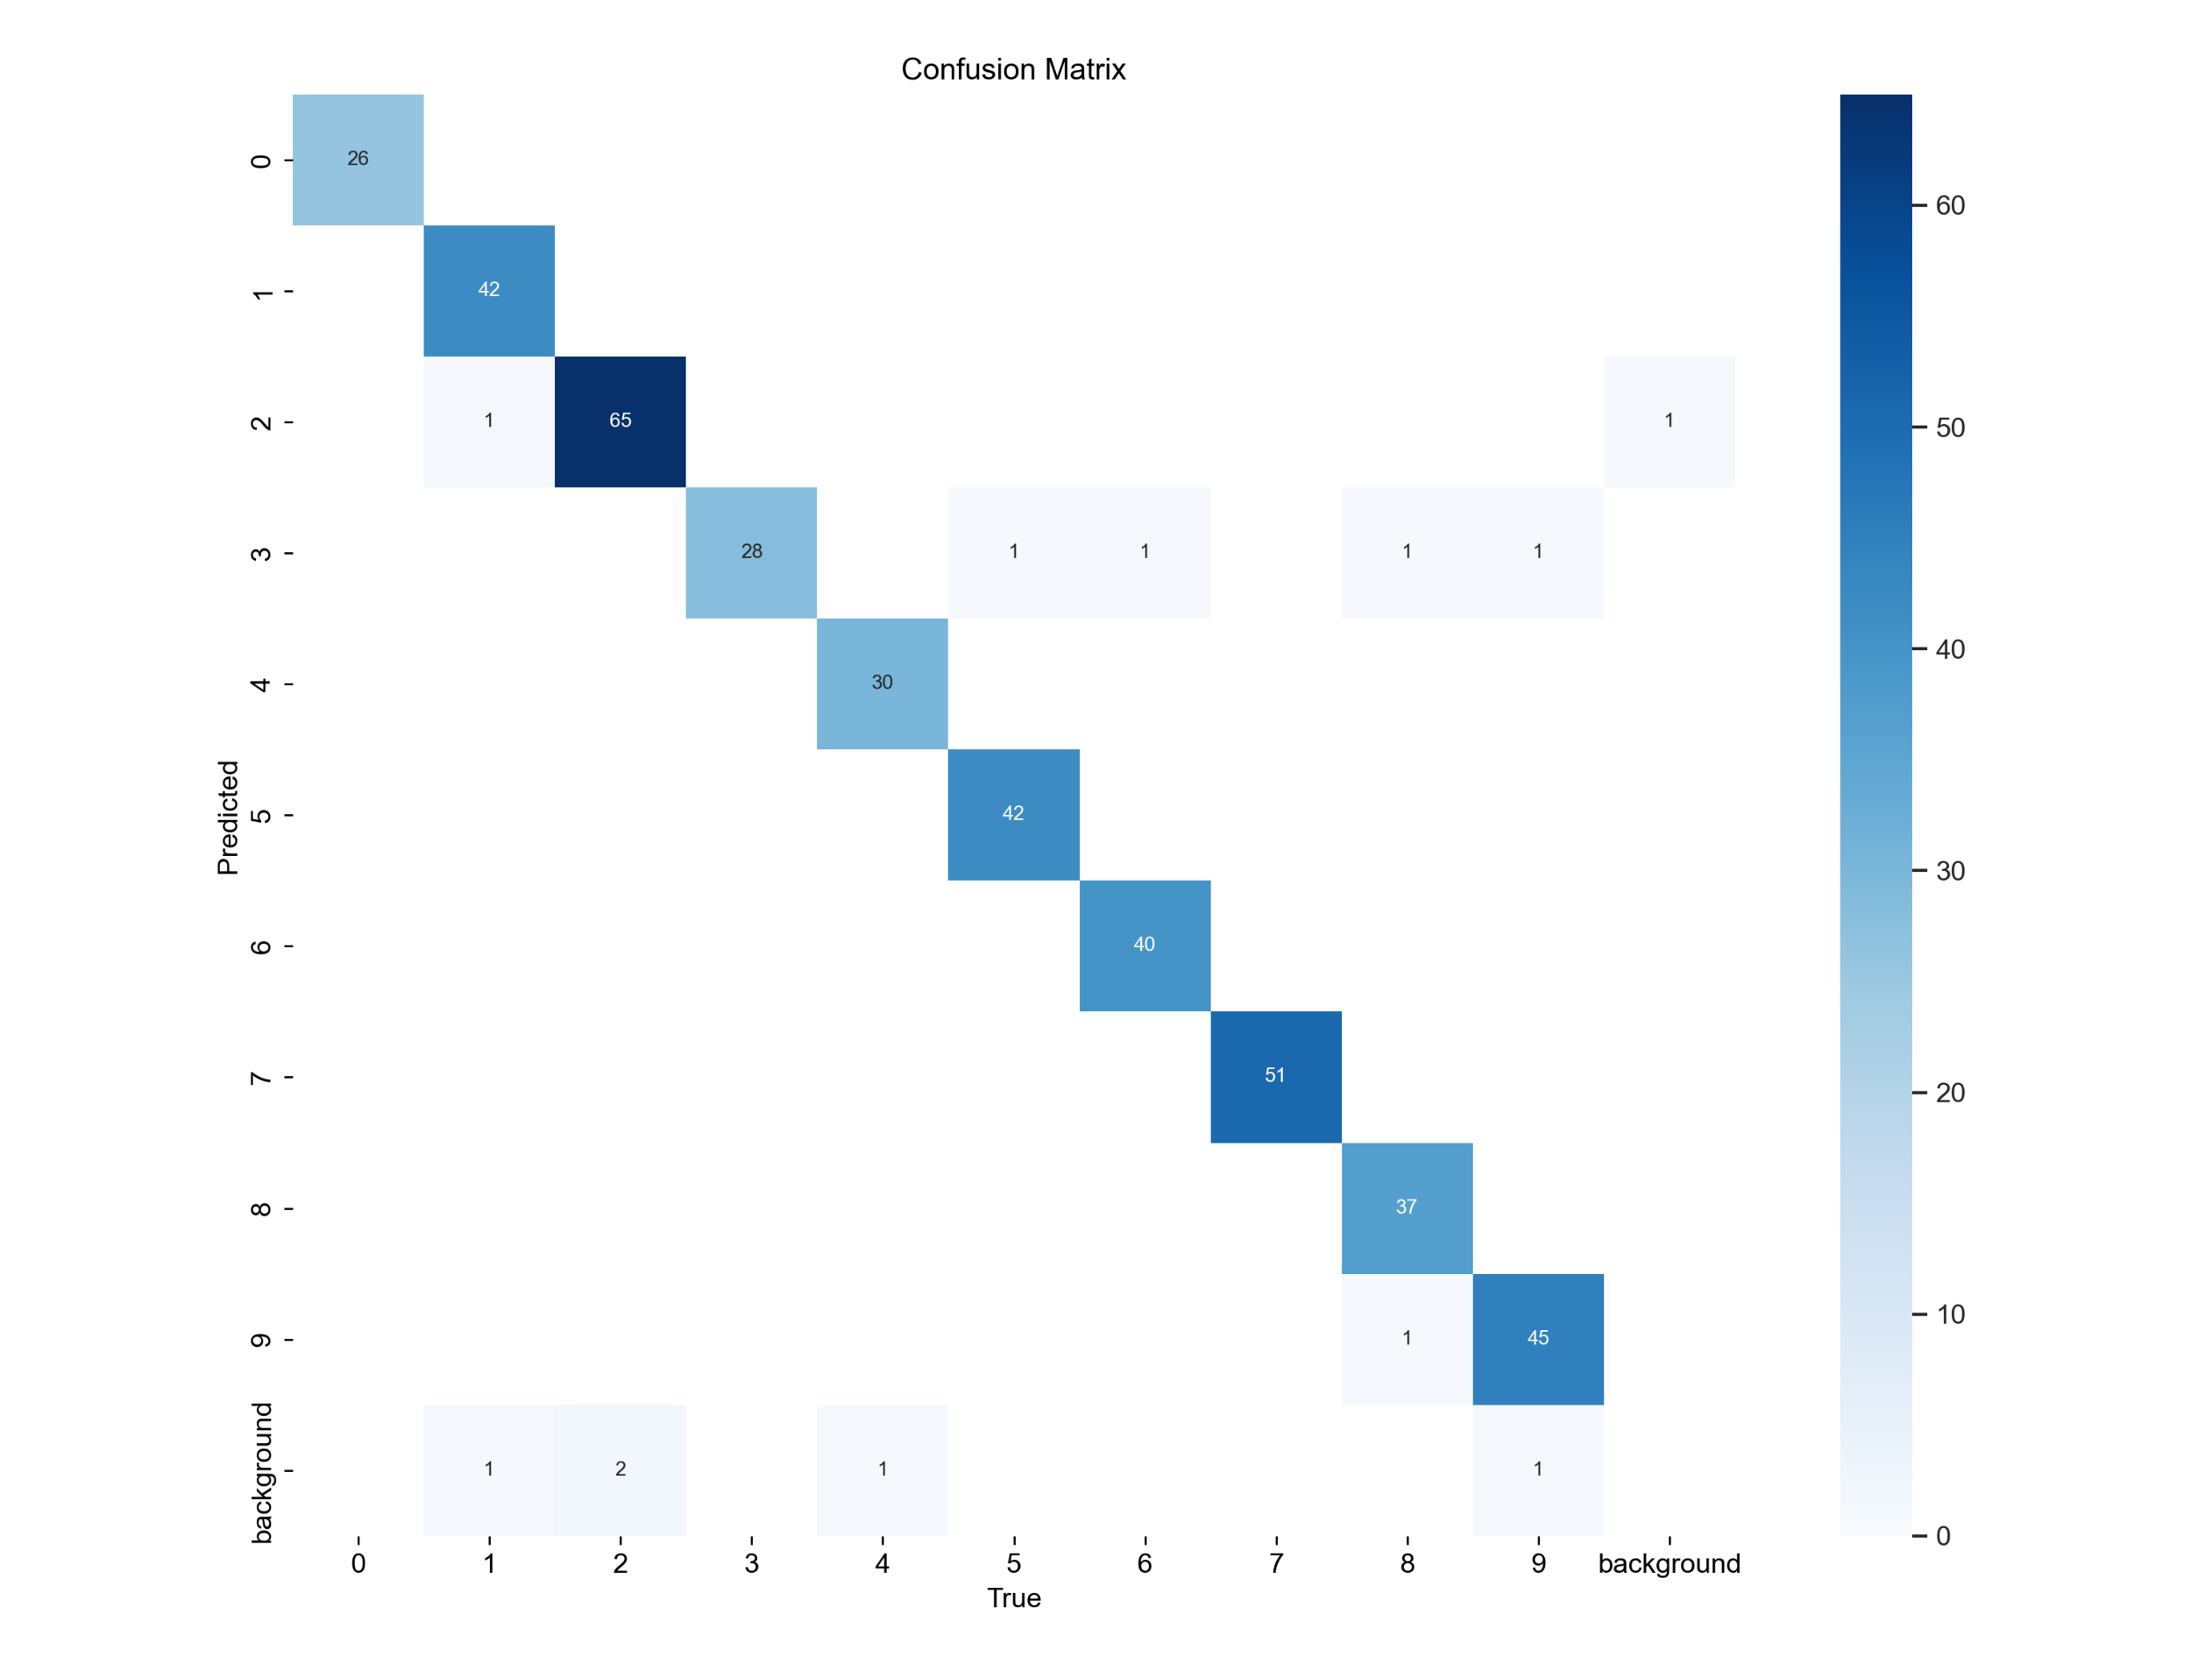

In [6]:
img = cv.imread('runs/detect/train10/confusion_matrix.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(15, 8), dpi=300)
plt.imshow(img)
plt.axis('off')
plt.show()

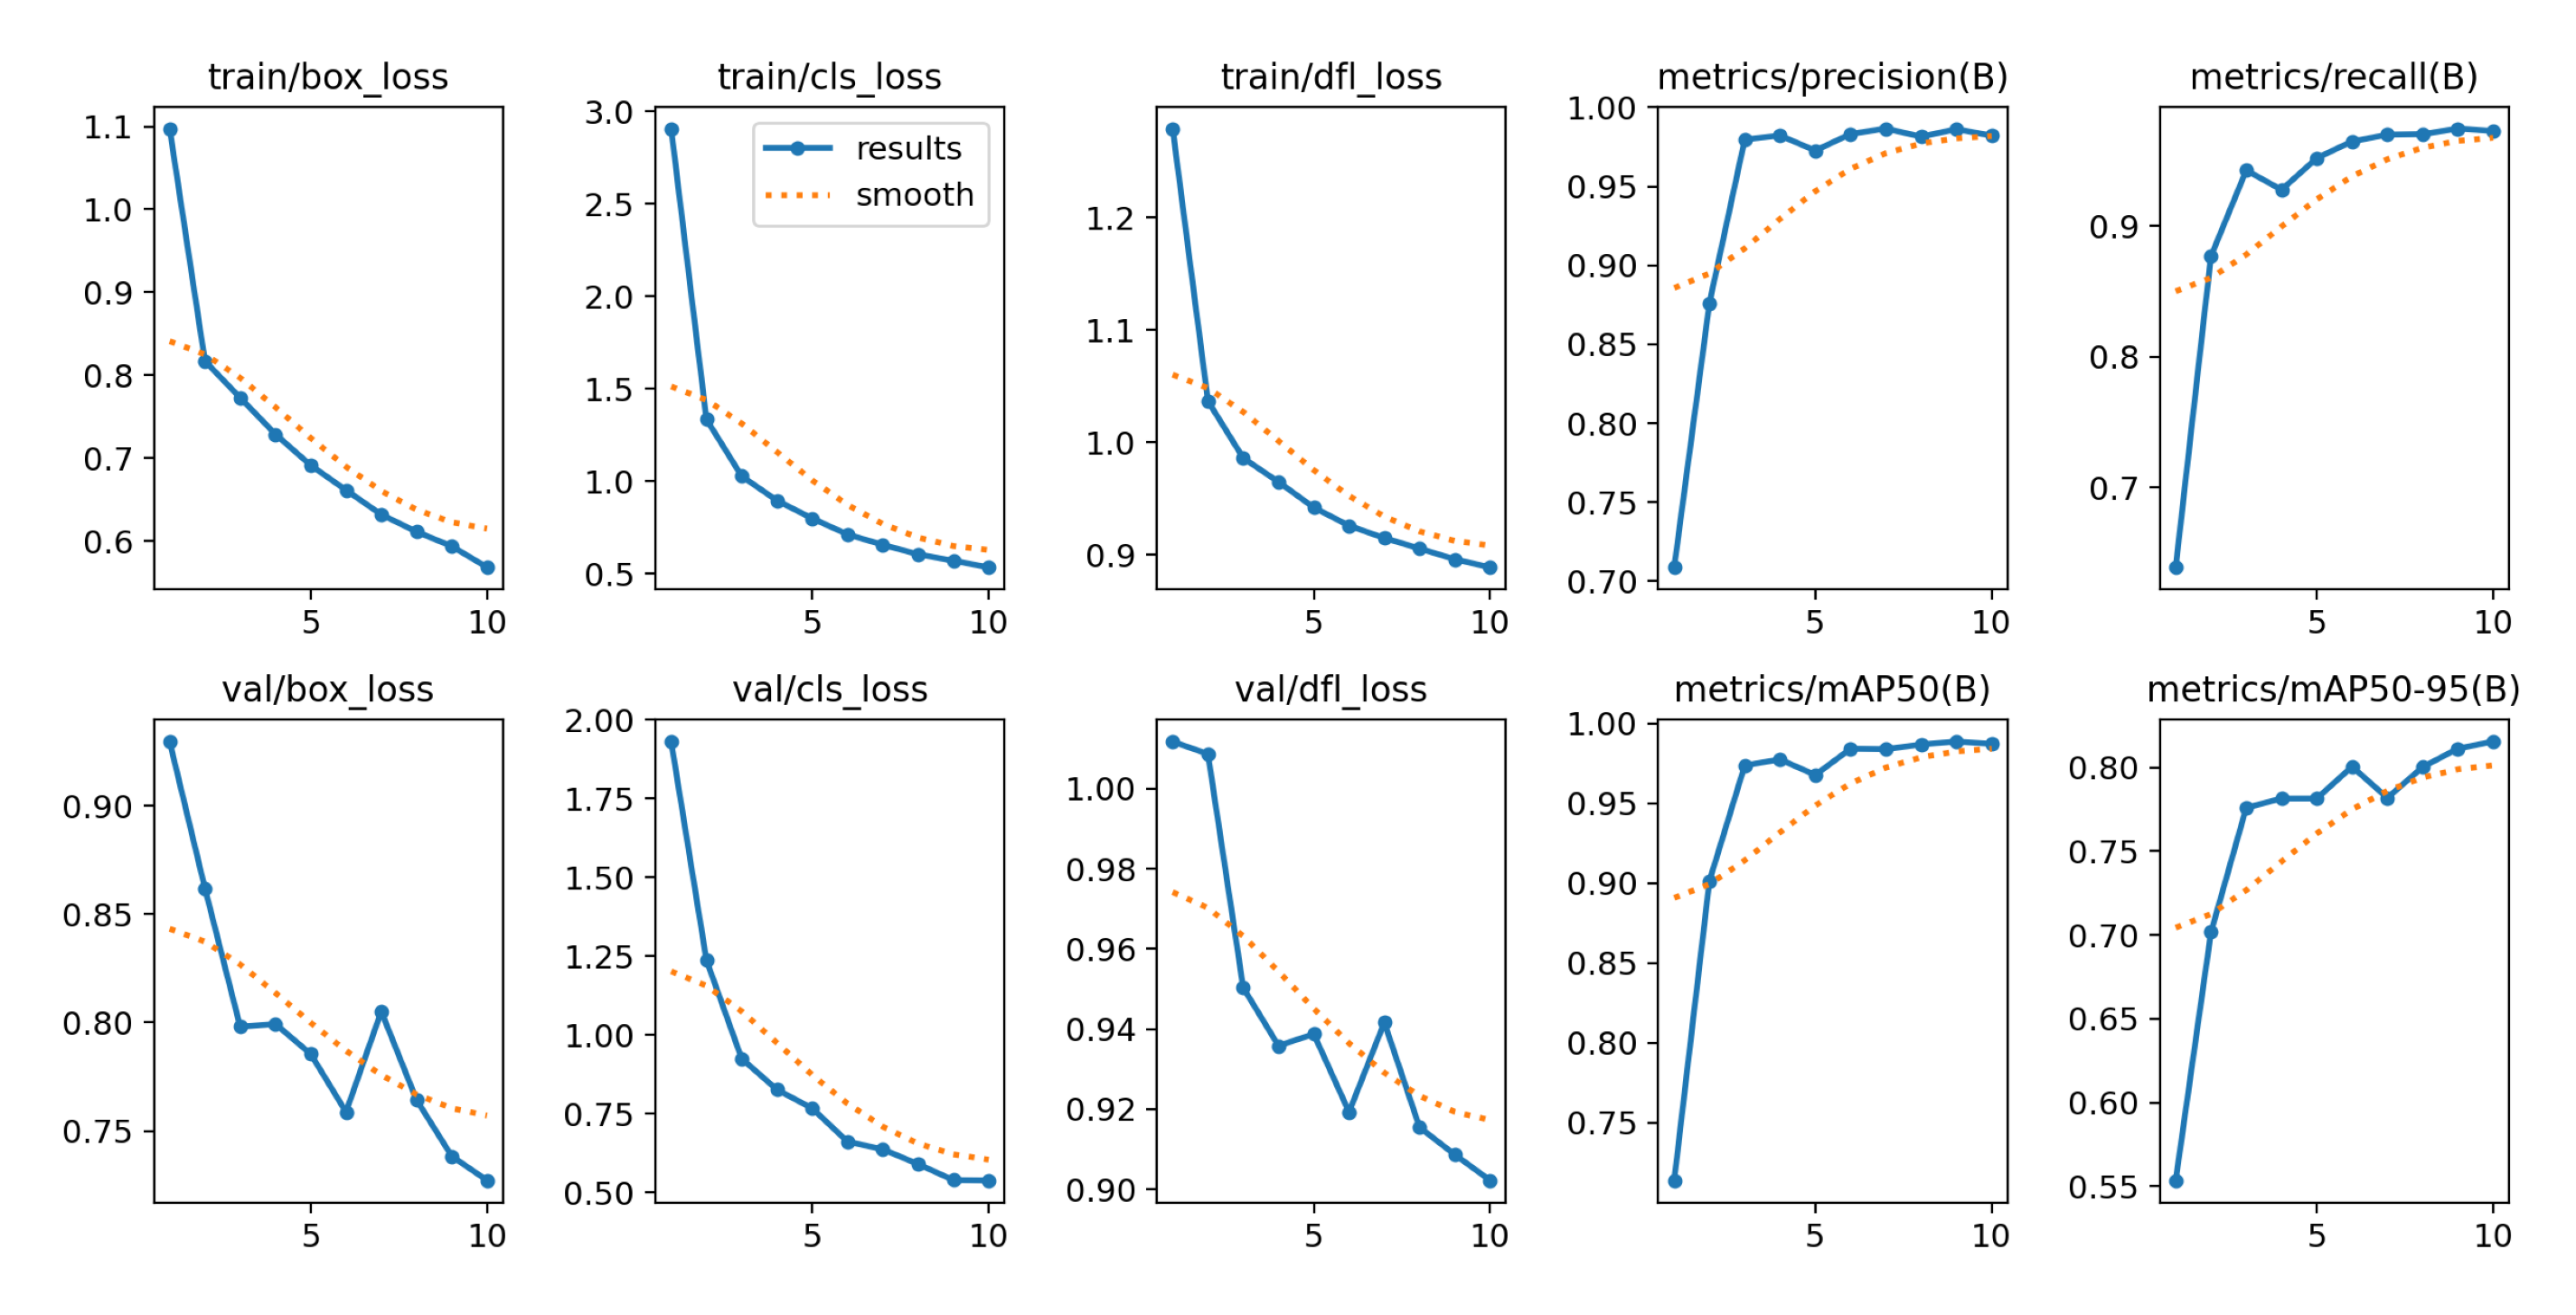

In [7]:
# Load and display the training results
img = cv.imread('runs/detect/train10/results.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12, 8), dpi=300)
plt.imshow(img)
plt.axis('off')
plt.show()

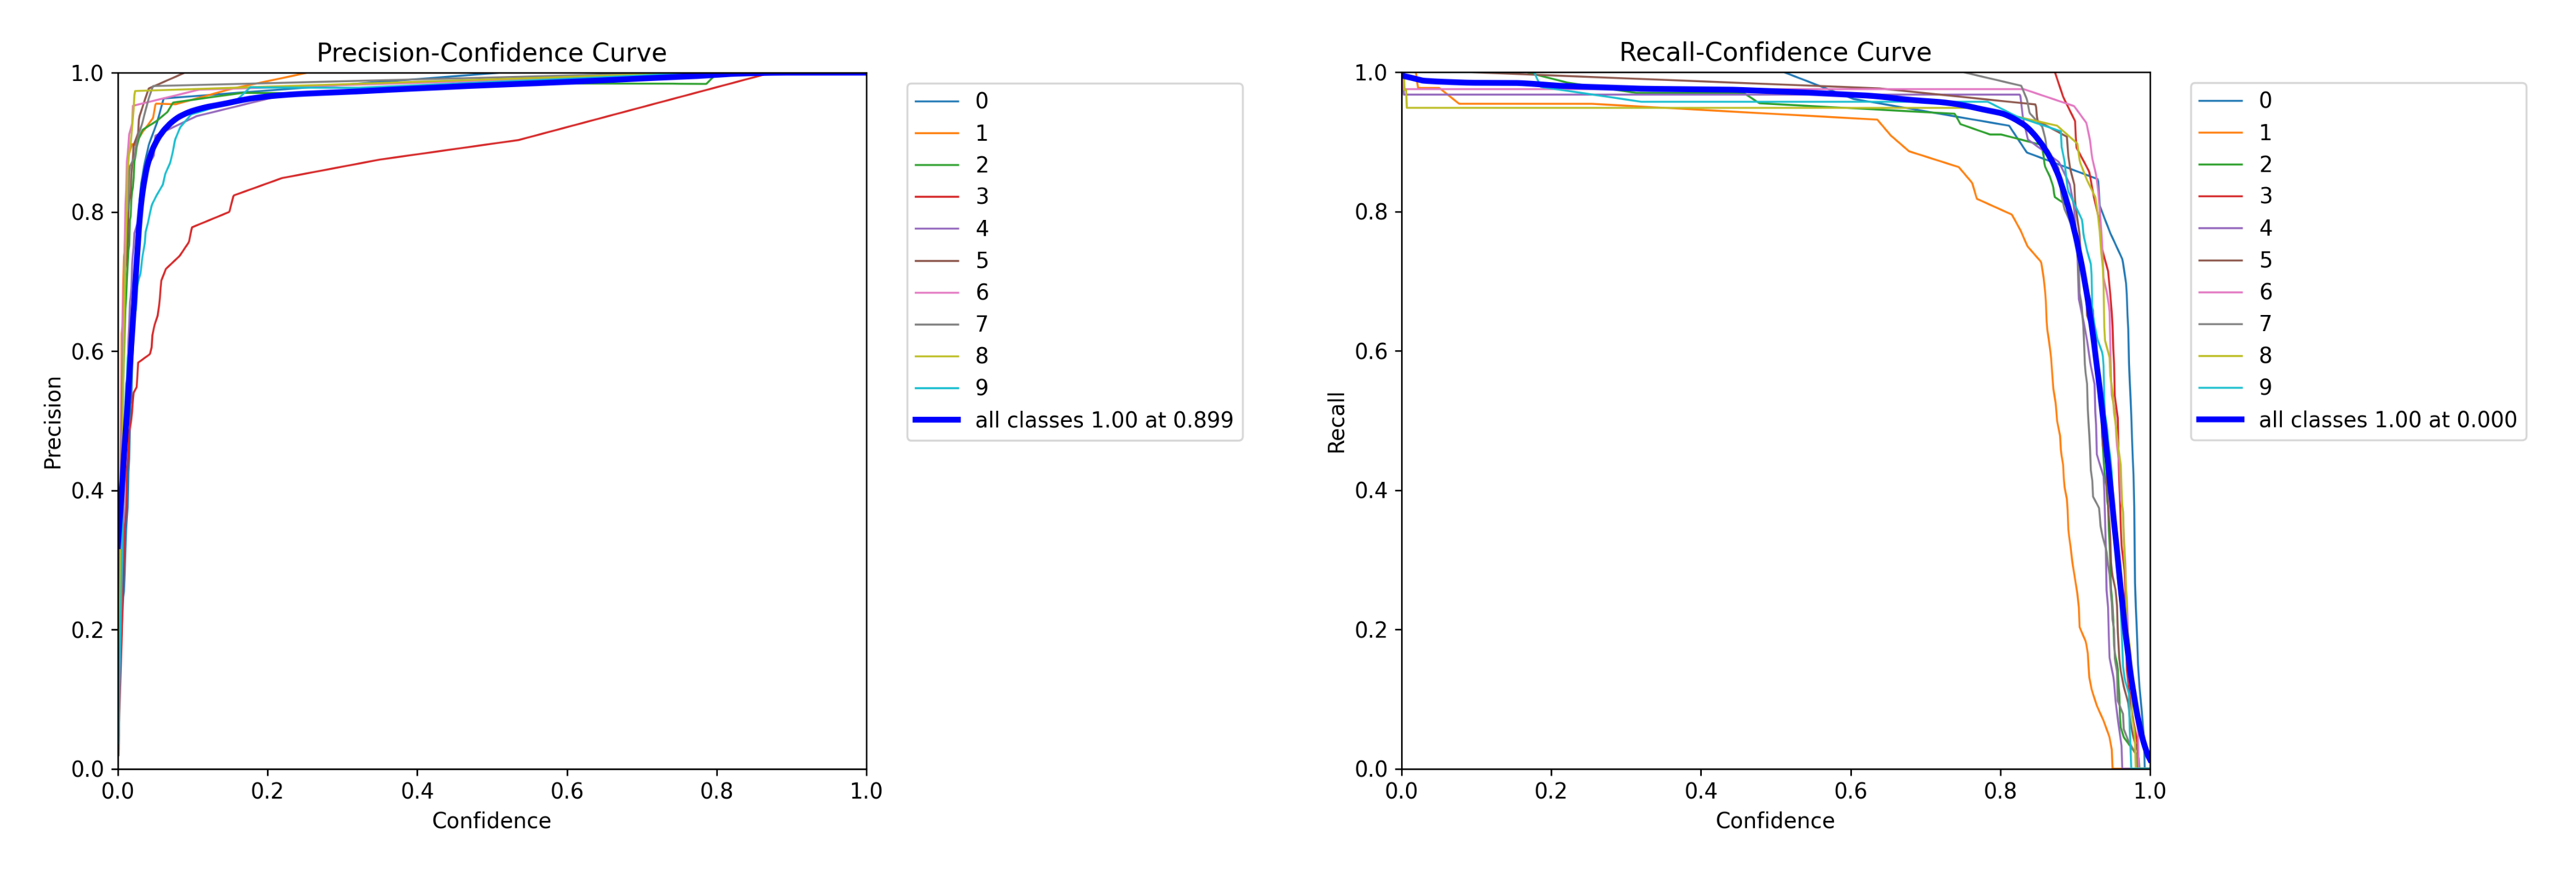

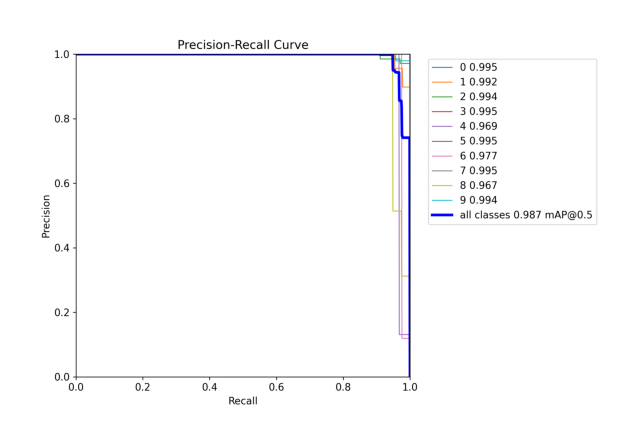

In [8]:
img1 = cv.imread('runs/detect/train10/P_curve.png')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('runs/detect/train10/R_curve.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.imread('runs/detect/train10/PR_curve.png')
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

fig,ax=plt.subplots(1,2, figsize=(14, 14), dpi=300)
ax[0].imshow(img1)
ax[1].imshow(img2)

for a in ax:
    a.axis('off')

plt.tight_layout()

plt.figure(figsize=(2.5, 5), dpi=300)
plt.imshow(img3)
plt.axis('off')
plt.show()

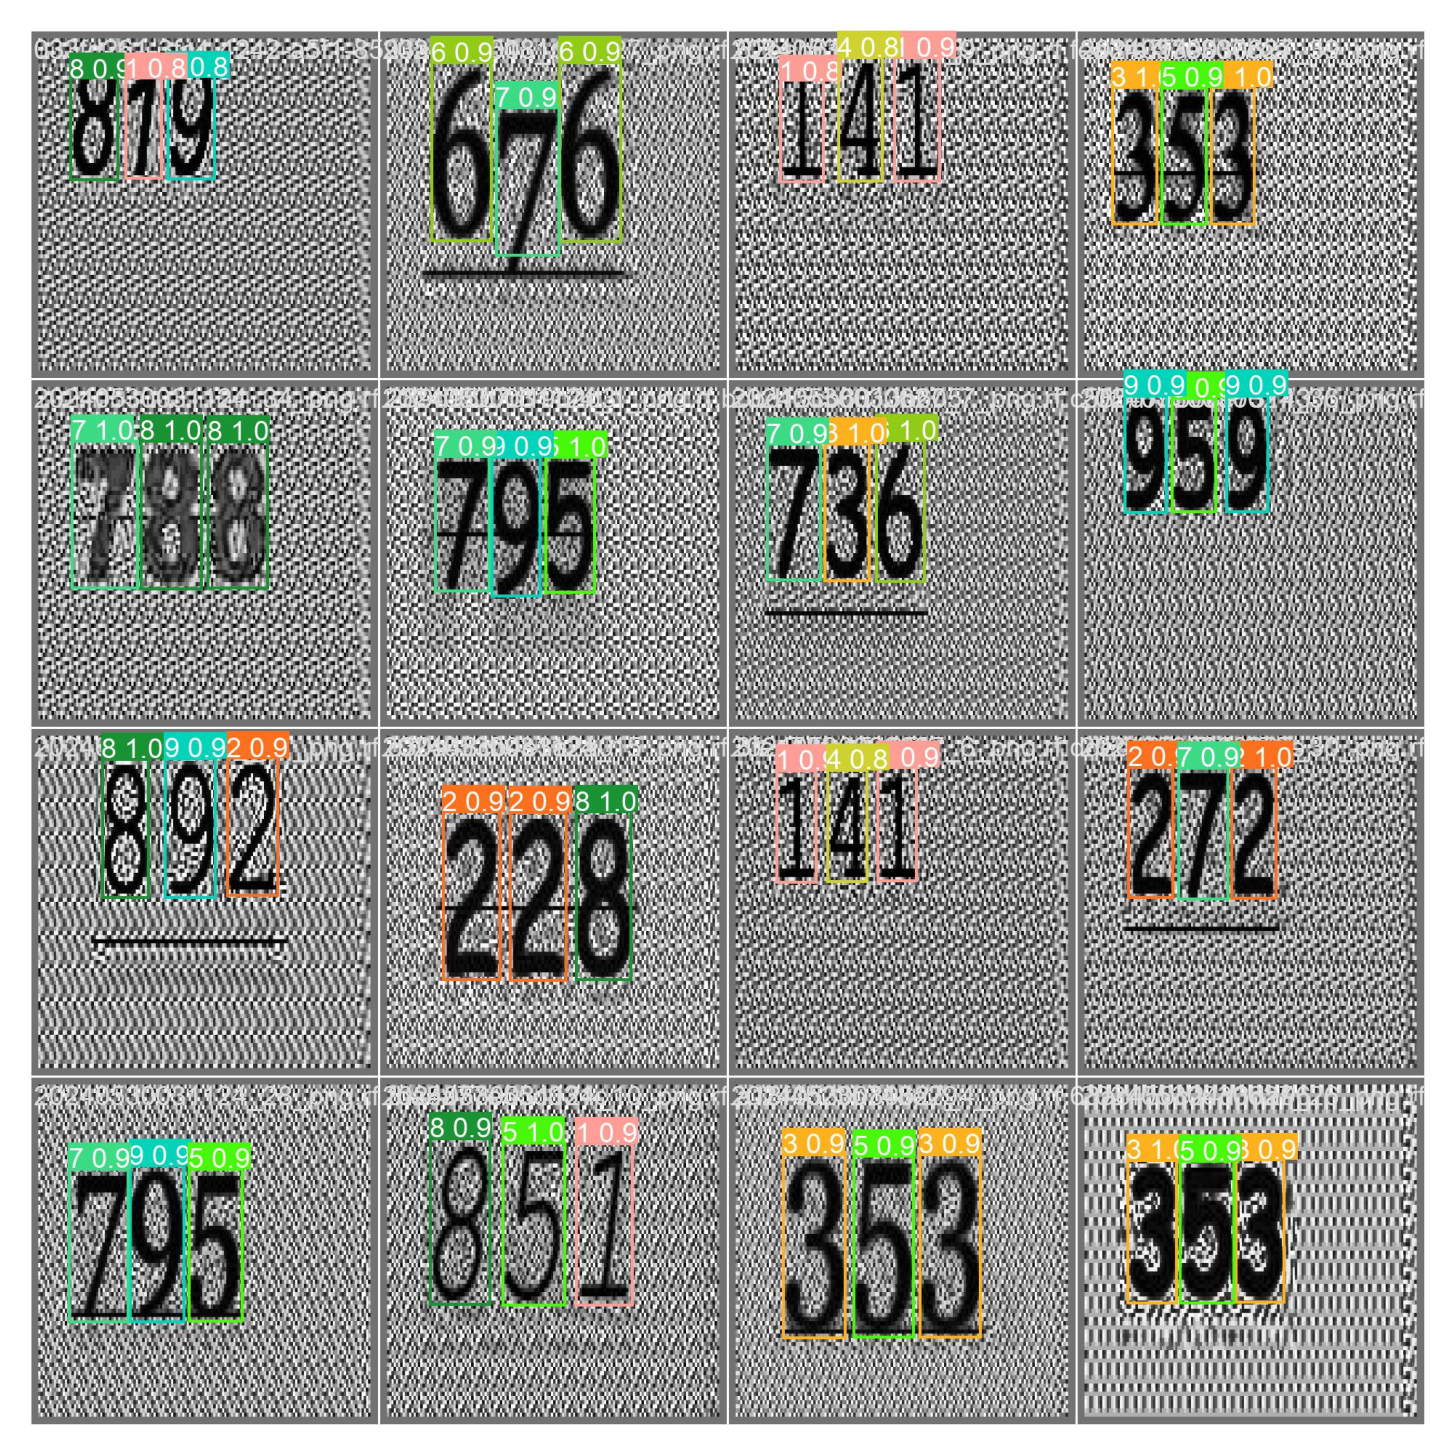

In [9]:
img = cv.imread('runs/detect/train10/val_batch0_pred.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(6, 8), dpi=300)
plt.imshow(img)
plt.axis('off')
plt.show()

## Evaluate the model

In [10]:
metrics = model.val()  # Evaluates the model on the validation dataset

Ultralytics YOLOv8.0.196  Python-3.10.9 torch-2.3.1+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning C:\Users\Rawan Mohamed\Desktop\AI Bootcamp\Day 3\digit_captcha-14\valid\labels.cache... 139 images, 0 bac
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:29<0
                   all        139        417      0.982      0.973      0.987      0.815
                     0        139         26      0.999          1      0.995      0.837
                     1        139         44          1       0.94      0.992      0.765
                     2        139         67      0.985      0.954      0.994      0.811
                     3        139         28      0.897          1      0.995      0.849
                     4        139         31      0.982      0.968      0.969      0.796
                     5        139         43        

In [11]:
results_dict = metrics.results_dict

mAP50 = results_dict.get('metrics/mAP50(B)', 'mAP50 not found')
precision = results_dict.get('metrics/precision(B)', 'Precision not found')
recall = results_dict.get('metrics/recall(B)', 'Recall not found')
mAP95 = results_dict.get('metrics/mAP50-95(B)', 'mAP50-95 not found')

# Print metrics
print(f"Precision: {precision}")  #The proportion of true positive detections among all positive detections
print(f"Recall: {recall}")        #The proportion of actual positive instances that the model correctly identified. 
print(f"mAP50: {mAP50}")
print(f"mAP50-95: {mAP95}")

Precision: 0.9821053483126725
Recall: 0.9726820635626969
mAP50: 0.9872694428029748
mAP50-95: 0.8149510669722934


## Testing model on a certain image


0: 640x640 1 3, 1 5, 2 9s, 212.6ms
Speed: 4.4ms preprocess, 212.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


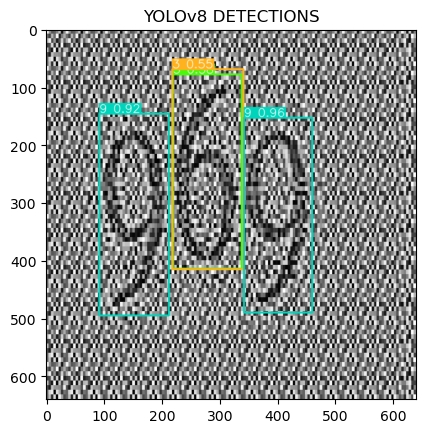

In [12]:
image1 = cv.imread('969.jpg')

results1 = model(image1)
annotated_frame = results1[0].plot()
plt.imshow(cv.cvtColor(annotated_frame, cv.COLOR_BGR2RGB))
plt.title('YOLOv8 DETECTIONS')
plt.show()


0: 640x640 1 1, 1 9, 176.8ms
Speed: 6.9ms preprocess, 176.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


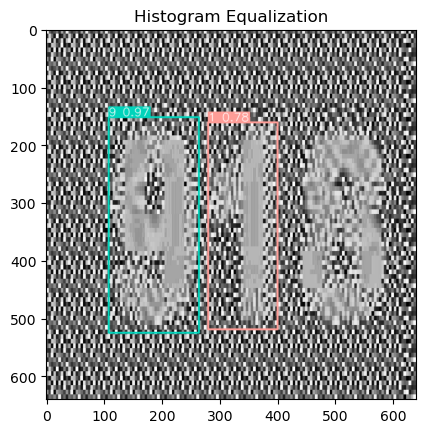


0: 640x640 1 0, 1 1, 1 9, 250.0ms
Speed: 1.0ms preprocess, 250.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


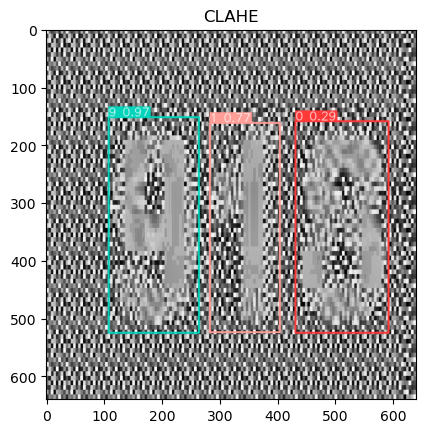


0: 640x640 1 0, 1 1, 1 9, 240.7ms
Speed: 6.1ms preprocess, 240.7ms inference, 8.0ms postprocess per image at shape (1, 3, 640, 640)


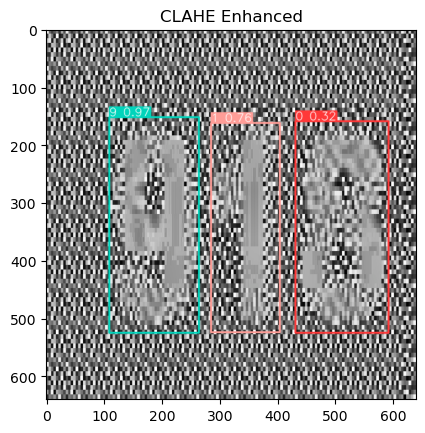


0: 640x640 1 1, 1 9, 172.2ms
Speed: 0.0ms preprocess, 172.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


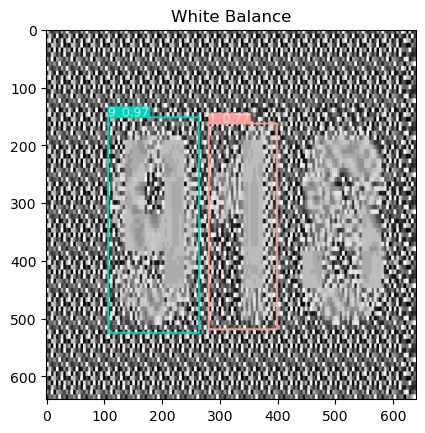

In [13]:
image2 = cv.imread('918.jpg')

def histogram_equalization(image):
    img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    equalized_img = cv.equalizeHist(img_gray)
    equalized_img = cv.cvtColor(equalized_img, cv.COLOR_GRAY2RGB)
    return equalized_img

def clahe_enhanced(image):
  lab = cv.cvtColor(image, cv.COLOR_BGR2LAB)
  l_channel, a, b = cv.split(lab)
  clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl_img = clahe.apply(l_channel)
  enhanced_lab = cv.merge([cl_img, a, b])
  enhanced_img = cv.cvtColor(enhanced_lab, cv.COLOR_LAB2BGR)
  return enhanced_img

def clahe(image):
    img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(img_gray)
    clahe_img = cv.cvtColor(clahe_img, cv.COLOR_GRAY2RGB)
    return clahe_img

def white_balance (image):
  result = cv.xphoto.createSimpleWB().balanceWhite(image)
  return result

equalized_img = histogram_equalization(image2)
results2 = model(equalized_img)
annotated_frame = results2[0].plot()
plt.imshow(cv.cvtColor(annotated_frame, cv.COLOR_BGR2RGB))
plt.title('Histogram Equalization')
plt.show()

clahe_img = clahe(image2)
results2 = model(clahe_img)
annotated_frame = results2[0].plot()
plt.imshow(cv.cvtColor(annotated_frame, cv.COLOR_BGR2RGB))
plt.title('CLAHE')
plt.show()

cl_img = clahe_enhanced(image2)
results2 = model(cl_img)
annotated_frame = results2[0].plot()
plt.imshow(cv.cvtColor(annotated_frame, cv.COLOR_BGR2RGB))
plt.title('CLAHE Enhanced')
plt.show()

wb_img = white_balance(image2)
results2 = model(wb_img)
annotated_frame = results2[0].plot()
plt.imshow(cv.cvtColor(annotated_frame, cv.COLOR_BGR2RGB))
plt.title('White Balance')
plt.show()

## Object Tracking

In [14]:
# Load the trained YOLO model
model = YOLO('yolov8n.pt')  # Use the trained YOLO model

# You can download the video from here -> https://www.pexels.com/video/baseball-training-852399/
# Load the video
cap = cv.VideoCapture('people and objects.mp4') # Put here the video path after downloading it

# Get video properties
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv.CAP_PROP_FPS)

# Define the codec and create VideoWriter object to save the video
fourcc = cv.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 file

# The resulted video willbe saved under the name -> output_cars
out = cv.VideoWriter('output_people_and_objects.mp4', fourcc, fps, (width, height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Perform object detection
    results = model(frame)

    # Display results
    annotated_frame = results[0].plot()  # Draw predictions on the frame
    
    # Write the annotated frame to the output video
    out.write(annotated_frame)
    
    # Resize the frame for a smaller display window
    resized_frame = cv.resize(annotated_frame, (640, 360))  # Resize to (width, height)
    
    cv.imshow('YOLO Detection', resized_frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv.destroyAllWindows()


0: 384x640 1 person, 151.3ms
Speed: 8.3ms preprocess, 151.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 161.1ms
Speed: 5.9ms preprocess, 161.1ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 157.9ms
Speed: 0.0ms preprocess, 157.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 150.2ms
Speed: 0.0ms preprocess, 150.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 141.7ms
Speed: 8.0ms preprocess, 141.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 134.4ms
Speed: 8.0ms preprocess, 134.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 122.0ms
Speed: 7.3ms preprocess, 122.0ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 120.1ms
Speed: 8.0ms preprocess, 120.1ms inference, 0.0ms postprocess per image a

Speed: 4.4ms preprocess, 126.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 118.1ms
Speed: 0.0ms preprocess, 118.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 118.7ms
Speed: 0.0ms preprocess, 118.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 109.8ms
Speed: 0.0ms preprocess, 109.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 car, 117.9ms
Speed: 8.3ms preprocess, 117.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 4 cars, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 3 cars, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 4 cars, 140.5ms
Speed: 0.0ms preprocess, 140.5ms inference, 3.8ms po


0: 384x640 1 person, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 125.8ms
Speed: 0.0ms preprocess, 125.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 118.8ms
Speed: 7.0ms preprocess, 118.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 124.9ms
Speed: 0.0ms preprocess, 124.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at


0: 384x640 (no detections), 116.2ms
Speed: 1.0ms preprocess, 116.2ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 125.9ms
Speed: 8.9ms preprocess, 125.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 baseball bats, 124.8ms
Speed: 2.2ms preprocess, 124.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 baseball bats, 125.1ms
Speed: 2.6ms preprocess, 125.1ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 frisbee, 2 baseball bats, 125.8ms
Speed: 0.0ms preprocess, 125.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 120.8ms
Speed: 8.0ms preprocess, 120.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 111.5ms
Speed: 4.0ms preprocess, 111.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball b

Speed: 7.1ms preprocess, 104.4ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bench, 1 baseball bat, 1 chair, 113.1ms
Speed: 8.0ms preprocess, 113.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bench, 1 frisbee, 1 baseball bat, 1 chair, 107.7ms
Speed: 3.6ms preprocess, 107.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bench, 1 frisbee, 1 baseball bat, 1 chair, 118.9ms
Speed: 0.0ms preprocess, 118.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bench, 1 baseball bat, 1 chair, 113.0ms
Speed: 6.4ms preprocess, 113.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bench, 1 baseball bat, 1 chair, 119.5ms
Speed: 0.0ms preprocess, 119.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 bench, 1 baseball bat, 1 chair, 105.1ms
Speed:

Speed: 3.0ms preprocess, 90.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 chair, 1 potted plant, 102.0ms
Speed: 2.0ms preprocess, 102.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 chair, 97.7ms
Speed: 1.8ms preprocess, 97.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 chair, 1 potted plant, 96.7ms
Speed: 2.8ms preprocess, 96.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 chair, 1 potted plant, 96.5ms
Speed: 3.6ms preprocess, 96.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 chairs, 1 potted plant, 89.7ms
Speed: 2.4ms preprocess, 89.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 1 chair, 1 potted plant, 90.2ms
Speed: 2.9ms preprocess, 90.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384,

Speed: 3.0ms preprocess, 92.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 persons, 80.1ms
Speed: 3.0ms preprocess, 80.1ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 apple, 75.0ms
Speed: 2.4ms preprocess, 75.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 96.1ms
Speed: 0.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 82.0ms
Speed: 0.0ms preprocess, 82.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 89.0ms
Speed: 2.0ms preprocess, 89.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 89.9ms
Speed: 2.2ms preprocess, 89.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 86.7ms
Speed: 6.5ms preprocess, 86.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 3

Speed: 2.0ms preprocess, 93.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 sports ball, 1 baseball bat, 78.0ms
Speed: 3.1ms preprocess, 78.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 76.4ms
Speed: 2.0ms preprocess, 76.4ms inference, 15.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 frisbee, 1 baseball bat, 75.6ms
Speed: 3.0ms preprocess, 75.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 frisbee, 81.0ms
Speed: 0.0ms preprocess, 81.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 95.5ms
Speed: 0.0ms preprocess, 95.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 2 baseball bats, 78.5ms
Speed: 2.0ms preprocess, 78.5ms inference, 13.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 fri


0: 384x640 1 person, 1 baseball bat, 91.6ms
Speed: 2.0ms preprocess, 91.6ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 92.2ms
Speed: 2.0ms preprocess, 92.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 96.1ms
Speed: 0.0ms preprocess, 96.1ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 91.8ms
Speed: 2.4ms preprocess, 91.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 90.2ms
Speed: 2.5ms preprocess, 90.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 1 baseball bat, 97.0ms
Speed: 0.0ms preprocess, 97.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 91.2ms
Speed: 2.9ms preprocess, 91.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 